<a href="https://colab.research.google.com/github/senorred/IDS-Data-Challenges/blob/master/Norred_Liz_BC_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Liz Norred, DS SEA 20a, 
Data Challenge 1, Breast Cancer Malignancy Detection



In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


First, import libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import csv as pandas dataframe, with ID as index. File was downloaded from the .gdoc file, and locally saved as .csv. Import the top row as header, the index column as index. Attempts to import the data in Int64 format failed because of the presence of unexpected strings indicating "null". Those values were included in the null dictionary. We can also find out how big the dataset is using df.shape.

---



In [3]:
df = pd.read_csv('/gdrive/My Drive/Insight Data Science/breast-cancer-wisconsin.csv', header = 0, index_col='Index', verbose=True, na_values={'No idea','#','?'}, keep_default_na=True, dtype='Int64')
print(df.shape)
print(df.dtypes)
df.head()

Tokenization took: 5.12 ms
Type conversion took: 104.69 ms
Parser memory cleanup took: 0.02 ms
(15855, 11)
ID                             Int64
Clump Thickness                Int64
Uniformity of Cell Size        Int64
Uniformity of Cell Shape       Int64
Marginal Adhesion              Int64
Single Epithelial Cell Size    Int64
Bare Nuclei                    Int64
Bland Chromatin                Int64
Normal Nucleoli                Int64
Mitoses                        Int64
Class                          Int64
dtype: object


,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Index,,,,,,,,,,,
0,1241035,7,8,3,7,4,5,7,8,2,4
1,1107684,6,10,5,5,4,10,6,10,1,4
2,691628,8,6,4,10,10,1,3,5,1,4
3,1226612,7,5,6,3,3,8,7,4,1,4
4,1142706,5,10,10,10,6,10,6,5,2,4


We know from the documentation that the dataset should have the following expected values for each feature: 


> Sample code number: id number 
Clump Thickness: 1 -10
Uniformity of Cell Size: 1 -10
Uniformity of Cell Shape: 1 -10
Marginal Adhesion: 1 -10
Single Epithelial Cell Size: 1 -10
Bare Nuclei: 1 -10
Bland Chromatin: 1 -10
Normal Nucleoli: 1 - 10
Mitoses: 1 - 10
Class: (2 for benign, 4 for malignant)

We have imported the data as integer class with <NA> values, but some of these values may be out of the expected range. A pairplot shows us that all columns have some data outside 1-10.



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


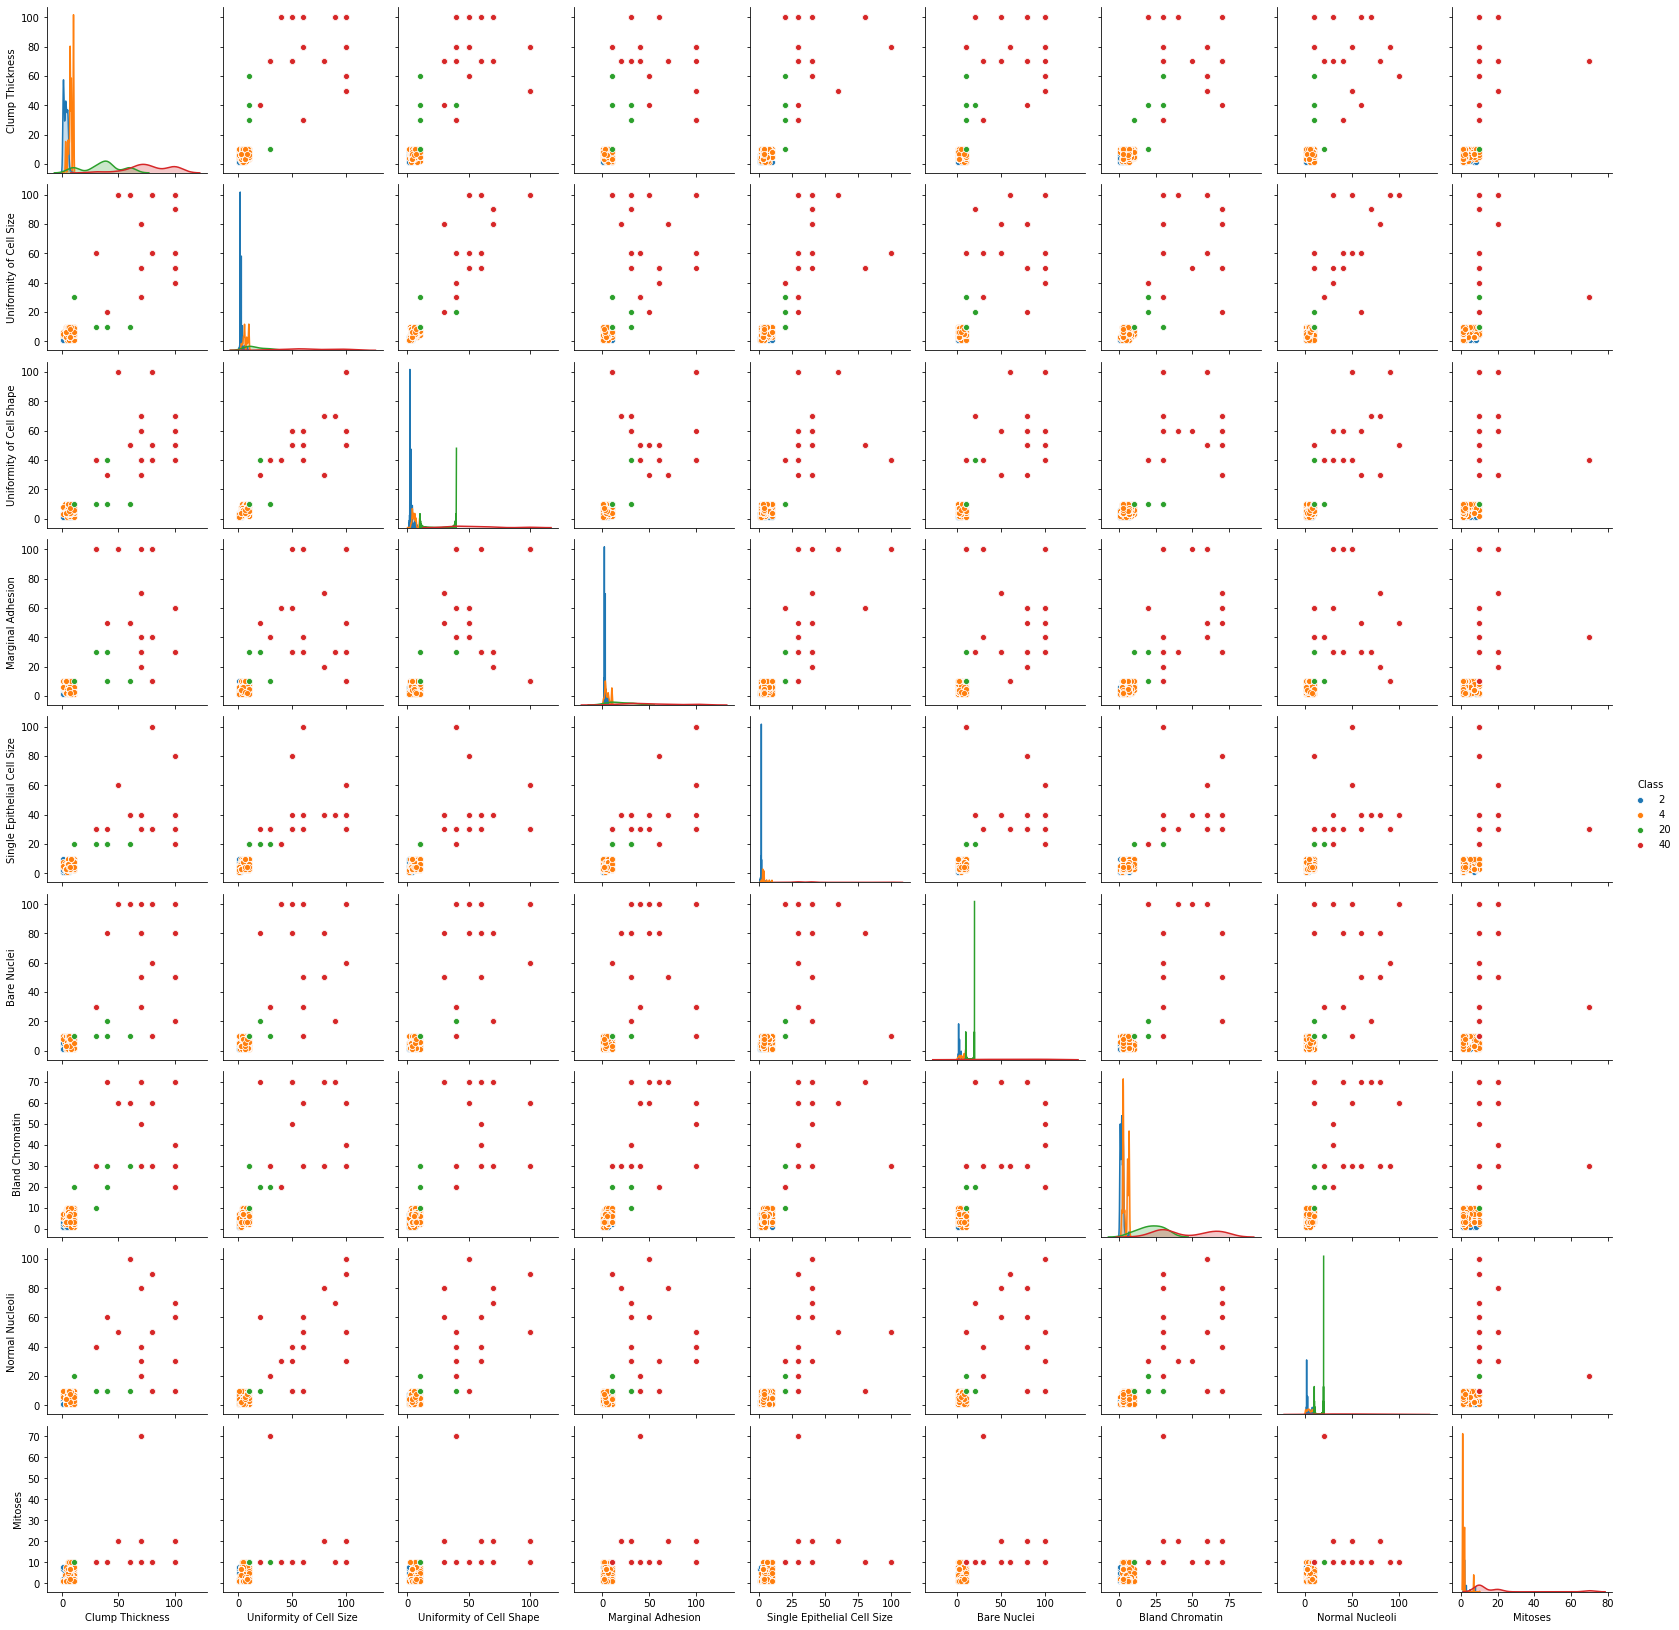

In [4]:
sns.pairplot(df.iloc[:,1:11], hue='Class')

The values higher than 10 appear to be values from 1-10 multiplied by ten, suggesting that these are incorrect inputs. It may be reasonable to assume that these values are input mistakes where the actual value is a factor of ten lower e.g. 30 -> 3, especially considering the categorical variables are multiplied by this factor. But since we do not know the origin of this input "mistake", and since the value of 10 may overlap with actual values of 1-10, we should exclude these samples. After finding out that samples containing above ten values are in the minority, we can exclude them from the dataset.

In [5]:
indices= df[df.iloc[:,1:11].values>10].index
df= df.drop(indices)
print(df.shape)
df.head()

(15698, 11)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Index,,,,,,,,,,,
0,1241035,7,8,3,7,4,5,7,8,2,4
1,1107684,6,10,5,5,4,10,6,10,1,4
2,691628,8,6,4,10,10,1,3,5,1,4
3,1226612,7,5,6,3,3,8,7,4,1,4
4,1142706,5,10,10,10,6,10,6,5,2,4


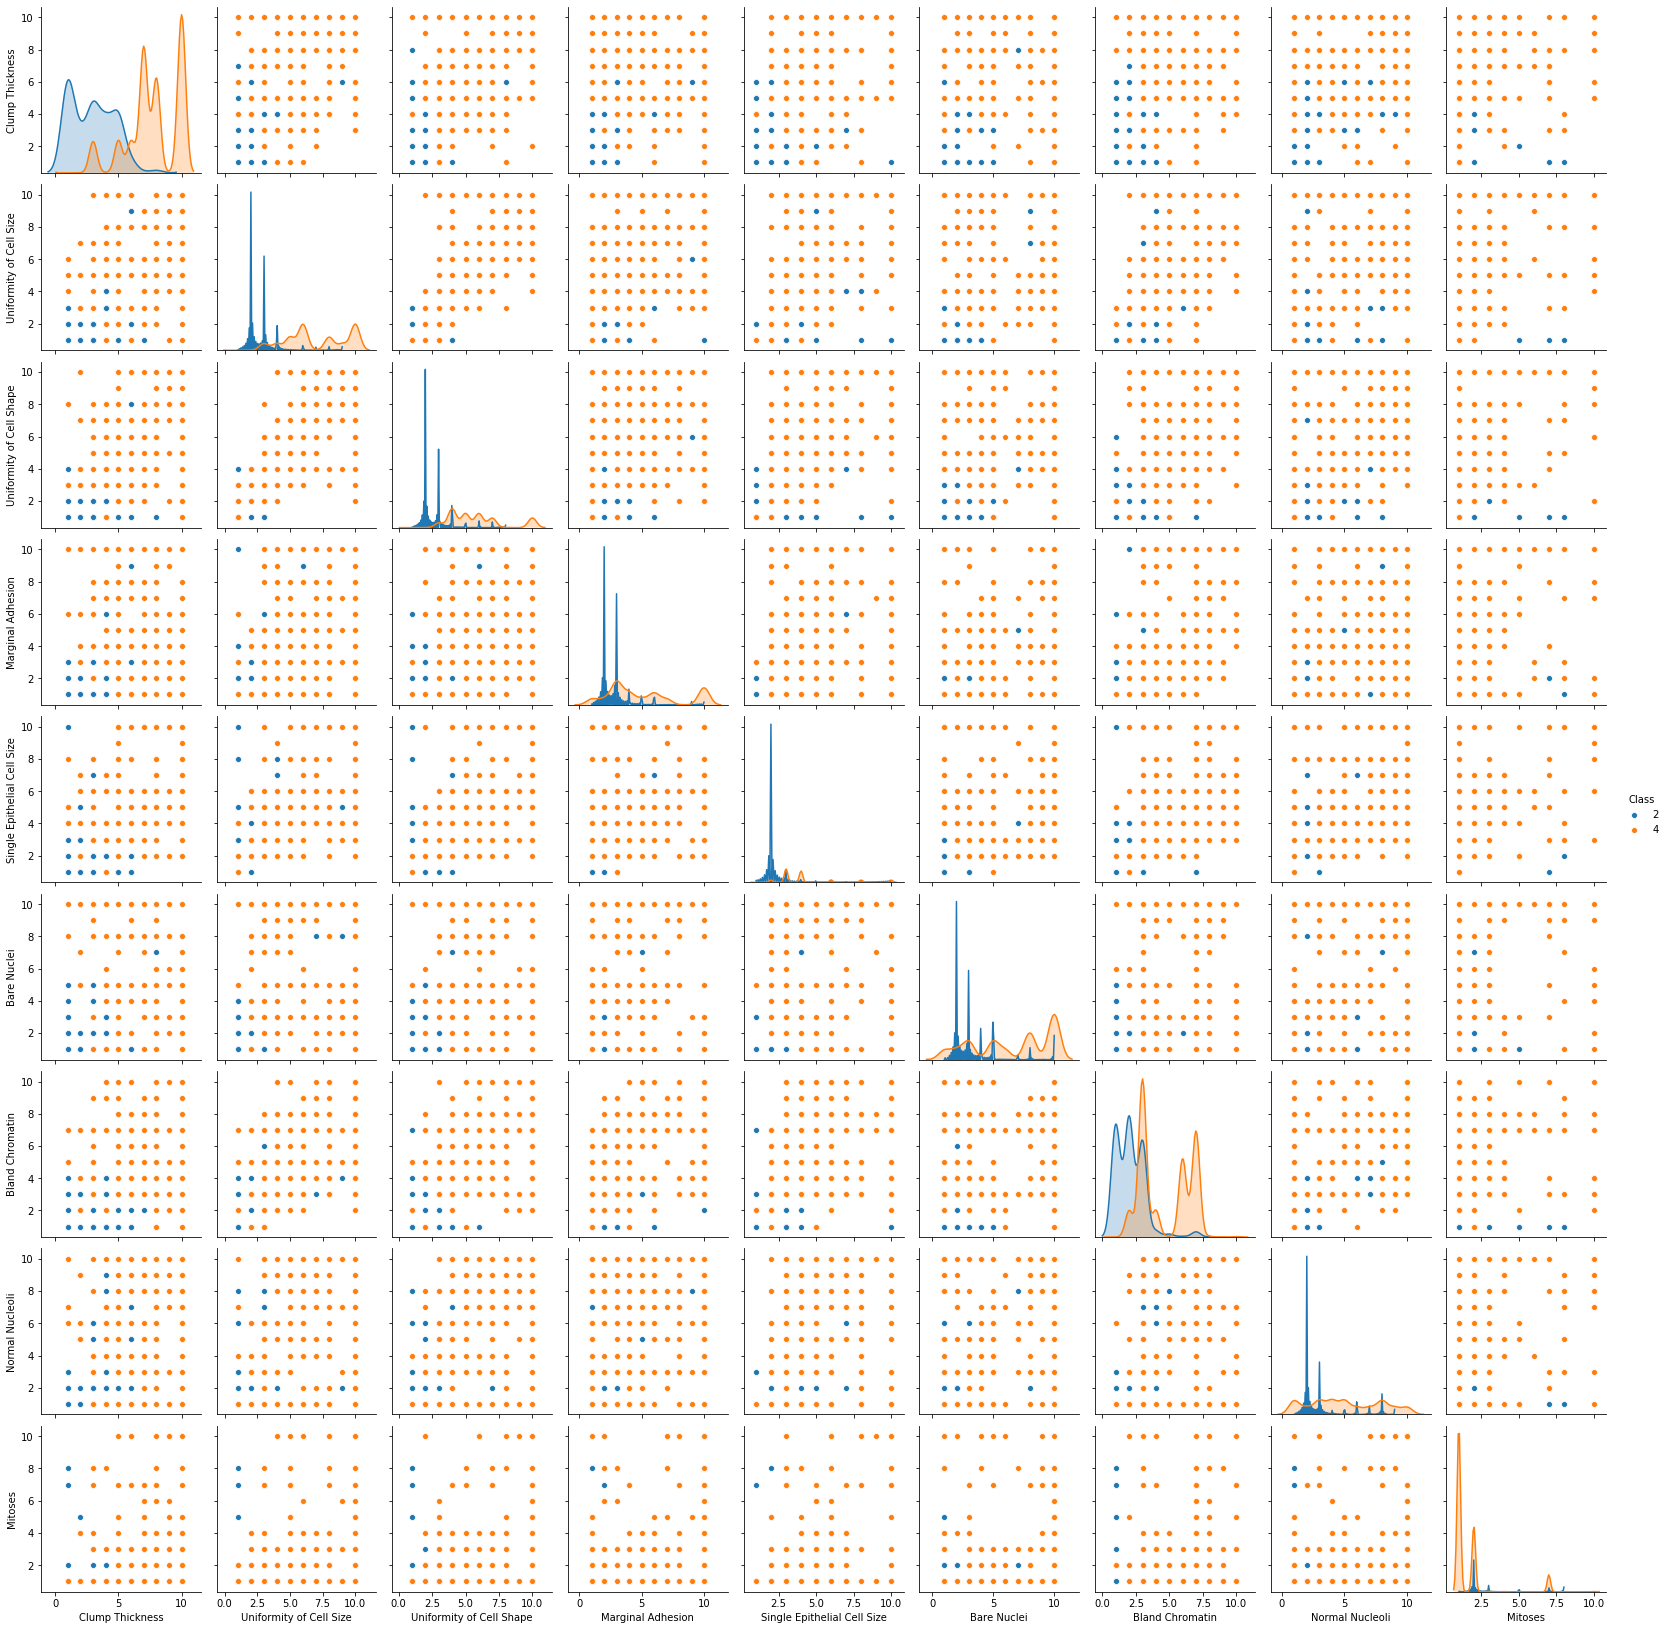

In [6]:
sns.pairplot(df.iloc[:,1:11], hue='Class')

The pairplot doesn't immediately reveal many correlations, except between Uniformity of Cell Size and Uniformity of Cell Shape. There are some clear separations in the histogram data. We can also note that this is a strongly imbalanced data set, since there are substantially fewer samples in the benign class (minority class). Now to handle the <NA> values. Since we don't want to lose much more data, we can impute the values for cells containing null values. But since we are lazy, and it is very late, we are just going to replace <NA> values with the rounded mean. Science!

In [6]:
means= round(df.iloc[:,1:11].mean())
print(means)

Clump Thickness                8.0
Uniformity of Cell Size        7.0
Uniformity of Cell Shape       6.0
Marginal Adhesion              5.0
Single Epithelial Cell Size    4.0
Bare Nuclei                    6.0
Bland Chromatin                5.0
Normal Nucleoli                5.0
Mitoses                        2.0
Class                          4.0
dtype: float64


In [7]:
df.fillna(means)


,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Index,,,,,,,,,,,
0,1241035,7,8,3,7,4,5,7,8,2,4
1,1107684,6,10,5,5,4,10,6,10,1,4
2,691628,8,6,4,10,10,1,3,5,1,4
3,1226612,7,5,6,3,3,8,7,4,1,4
4,1142706,5,10,10,10,6,10,6,5,2,4
...,...,...,...,...,...,...,...,...,...,...,...
15850,1169049,7,3,4,4,3,3,3,2,7,4
15851,1076352,3,6,4,10,3,3,3,4,1,4
15852,1107684,6,10,5,5,4,10,6,10,1,4


In [8]:
df = df.dropna
any(df.isna())

True

In [27]:
train_features, test_features, train_labels, test_labels = train_test_split(df.iloc[:,1:10], df['Class'], test_size = 0.25, random_state = 42, stratify=df['Class'])
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

train_binary = pd.get_dummies(train_labels)
test_binary= pd.get_dummies(test_labels)
test_labels= test_binary[2]
train_labels= train_binary[2]

print('There are {:d} payers in the train set and {:d} payers in the test set'.format(np.sum(train_labels),np.sum(test_labels)))



Training Features Shape: (11703, 9)
Training Labels Shape: (11703,)
Testing Features Shape: (3901, 9)
Testing Labels Shape: (3901,)
There are 331 payers in the train set and 111 payers in the test set


In [29]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
tf, tl = sm.fit_resample(train_features, train_labels)

print('There are {:d} payers out of {:d} in the resampled train set'.format(np.sum(tl),len(tl)))



There are 11372 payers out of 22744 in the resampled train set


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [30]:
clf = RandomForestClassifier(n_estimators = 1000, max_depth= 10, random_state = 42)
print('forest made')
clf.fit(train_features, train_binary[2]);
print('model trained')

forest made
model trained


In [40]:
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix

# Predict classifications of test data
test_pred = clf.predict(test_features)
# Create vector with validation values of test data
test_val = test_binary[2]

# Output the number of incorrect classifications
print('Random Forest classifier generated {:d} misclassifications out of {:d} resulting in {:f} classification error.'.format(np.sum(test_pred != test_val),len(test_val),np.sum(test_pred != test_val)/len(test_val)))
print('Test Accuracy score:', clf.score(test_features, test_labels))
print('Train Accuracy score:', clf.score(tf, tl))
print('Precision score:', precision_score(test_labels, test_pred))
print('Recall score:', recall_score(test_labels, test_pred))
print('Logistic Regression classifier F1 score:',metrics.f1_score(test_labels,test_pred))
confusion_matrix(test_labels,test_pred)

Random Forest classifier generated 8 misclassifications out of 3901 resulting in 0.002051 classification error.
Test Accuracy score: 0.9979492437836452
Train Accuracy score: 0.9946799155821315
Precision score: 0.9724770642201835
Recall score: 0.954954954954955
Logistic Regression classifier F1 score: 0.9636363636363636


array([[3787,    3],
       [   5,  106]])

In [36]:
importances= pd.DataFrame(clf.feature_importances_,index= df.columns[1:10] ,columns=['importance']).sort_values('importance',ascending=False)
print(importances)

                             importance
Uniformity of Cell Size        0.365011
Uniformity of Cell Shape       0.333292
Clump Thickness                0.108260
Bland Chromatin                0.055537
Bare Nuclei                    0.045714
Single Epithelial Cell Size    0.043477
Marginal Adhesion              0.026093
Normal Nucleoli                0.020271
Mitoses                        0.002345
